<a href="https://colab.research.google.com/github/JosephKiburu/Moringa-Core/blob/main/Joseph_Kiburu_WEEK_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSESSMENT QUESTION**

Real estate is one of the most rapidly expanding ventures and one of the best investments most investors are keen on investing their money on. Most investors already in the real estate business have enjoyed and are still enjoying the lucrative profits the business has brought them. The question that most people or potential real estate investors ask themselves is what are the major factors that will contribute to their success in the real estate business. What will make their houses worth buying? Which qualities of the property being sold makes the property worth the price tag placed on it? This report aims at answering these questions by studying and understanding factors that affect housing prices and the weight each factor has on the price. You can find the dataset used for our study [here](http://bit.ly/IndependentProjectWeek7Dataset).

**SPECIFYING THE QUESTION**

To figure out which factors affect housing prices in real estate properties and the weight each relevant factor has in predicting the  price.

**DEFINING THE METRIC FOR SUCCESS**

We will focus on training different regression models using the train set and using the regression models for predicting the prices in our test set. We will also look at the best regression model to go with. To achieve these, we will define our predictor variables and our target variable which in this case is the house price. We will consider a regression model our best model if it has an accuracy of **70%** and above.

**UNDERSTANDING THE CONTEXT**

We are dealing with only one dataset in our study. This dataset consists of different real estate properties with different property characteristics and the house price of each property. 

**EXPERIMENTAL DESIGN**

We expect the following workflow in our study:


*   Data cleaning and preparation
    *  Load libraries and dataset
    *  Dealing with missing values
    *  Dealing with duplicated values
    *  Checking for outliers

*   Performing Exploratory Data Analysis
    *  Univariate Analysis
    *  Bivariate Analysis
    *  Multivariate Analysis

*   Performing feature engineering
*   Checking for multicollinearity
*   Creating our first multiple linear regression model
*   Creating a residual plot
*   Checking for heteroskedasticity
*   Perform Quantile regression
*   Perform Ridge Regression
*   Perform Lasso Regression
*   Perform Net Regression
*   Conclusion



**DATA RELEVANCE**

The following are our dataset columns:

* Id - The house Id
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode of the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15



In [280]:
# Importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
# Loading our dataset

df=pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**DATA EXPLORATION**


In [282]:
# Previewing the top of our dataset

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [283]:
# Determining the number of records in our dataset

df.shape

(21613, 20)

Our dataset has 21,613 rows and 20 columns.

**DATA WRANGLING: CHECKING THE DATA AND TYDING THE DATASET**


In [284]:
# Checking for null values

df.isnull().sum().sum()

0

In [285]:
# Cheking for duplicates

df.duplicated().sum()

3

In [286]:
# Dropping the duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [287]:
# Checking the column data types

df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Some of the columns such as the id and zipcode columns are classified as numerical. In other cases we might decide to convert them to categorical to prevent them from interfering with our analysis but in this case, since regression models work with only numerical values, we will not convert them. There is a possibility of even not using them in our regression model if they are not relevant.

In [288]:
# Selecting the necessary columns

df.drop(['id','zipcode'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


I have decided to drop the id and zipcode columns which I believe are not relevant in our prediction. However, I am doubtful as to whether all the remaining columns especially the 'yr_built' and 'yr_renovated' columns are relevant in building our models. This is where the other types of regressions come in. Lasso regression for instance will tell me whether the columns are useful or not by remoiving the irrelevant ones. Therefore, I will work with these columns and **not** risk dropping columns which I think are not important but are actually very important in predicting the house price.

**EXPLORATORY DATA ANALYSIS**

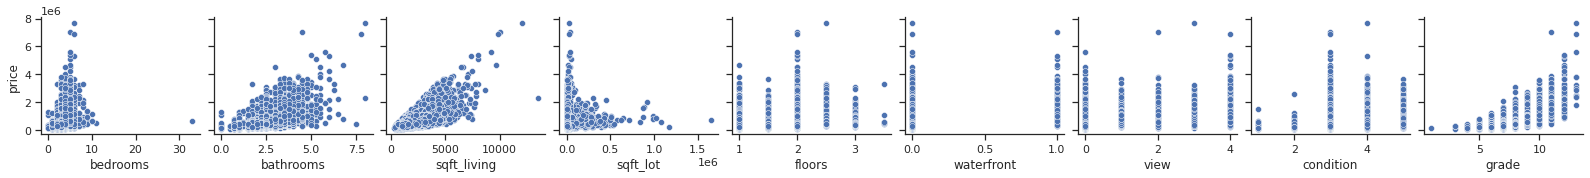

In [289]:
# Plotting the relationships between the independent variables and the dependent variable(price).

sns.set(style='ticks', color_codes=True)
sns.pairplot(data=df, x_vars=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade'], y_vars=['price'])

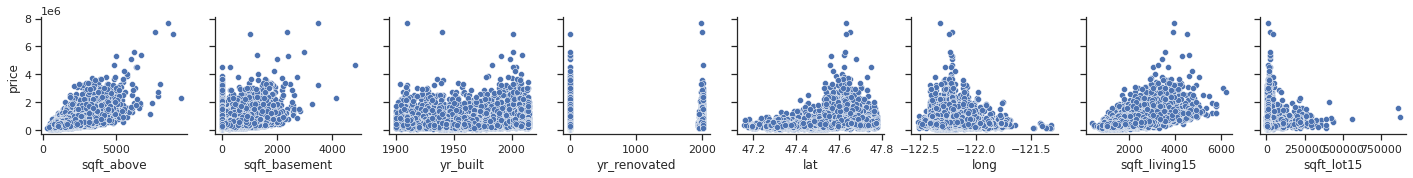

In [290]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(data=df, x_vars=['sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'], y_vars=['price'])

From the above pairplots we can see that our dataset contains both discrete variables and continuous variables.

We are required to create different regression models using different regression techniques in this study. By starting with a slightly worst fit in our multiple linear regression, we can provide better long term predictions using the other types of regression techniques. We need to show the impact the other regression techniques have compared to our linear regression technique. We can create the worst fit in our multiple linear regression by keeping outliers, keeping correlated values and also keeping irrelevant columns. These will however be dealt with in other regression models.

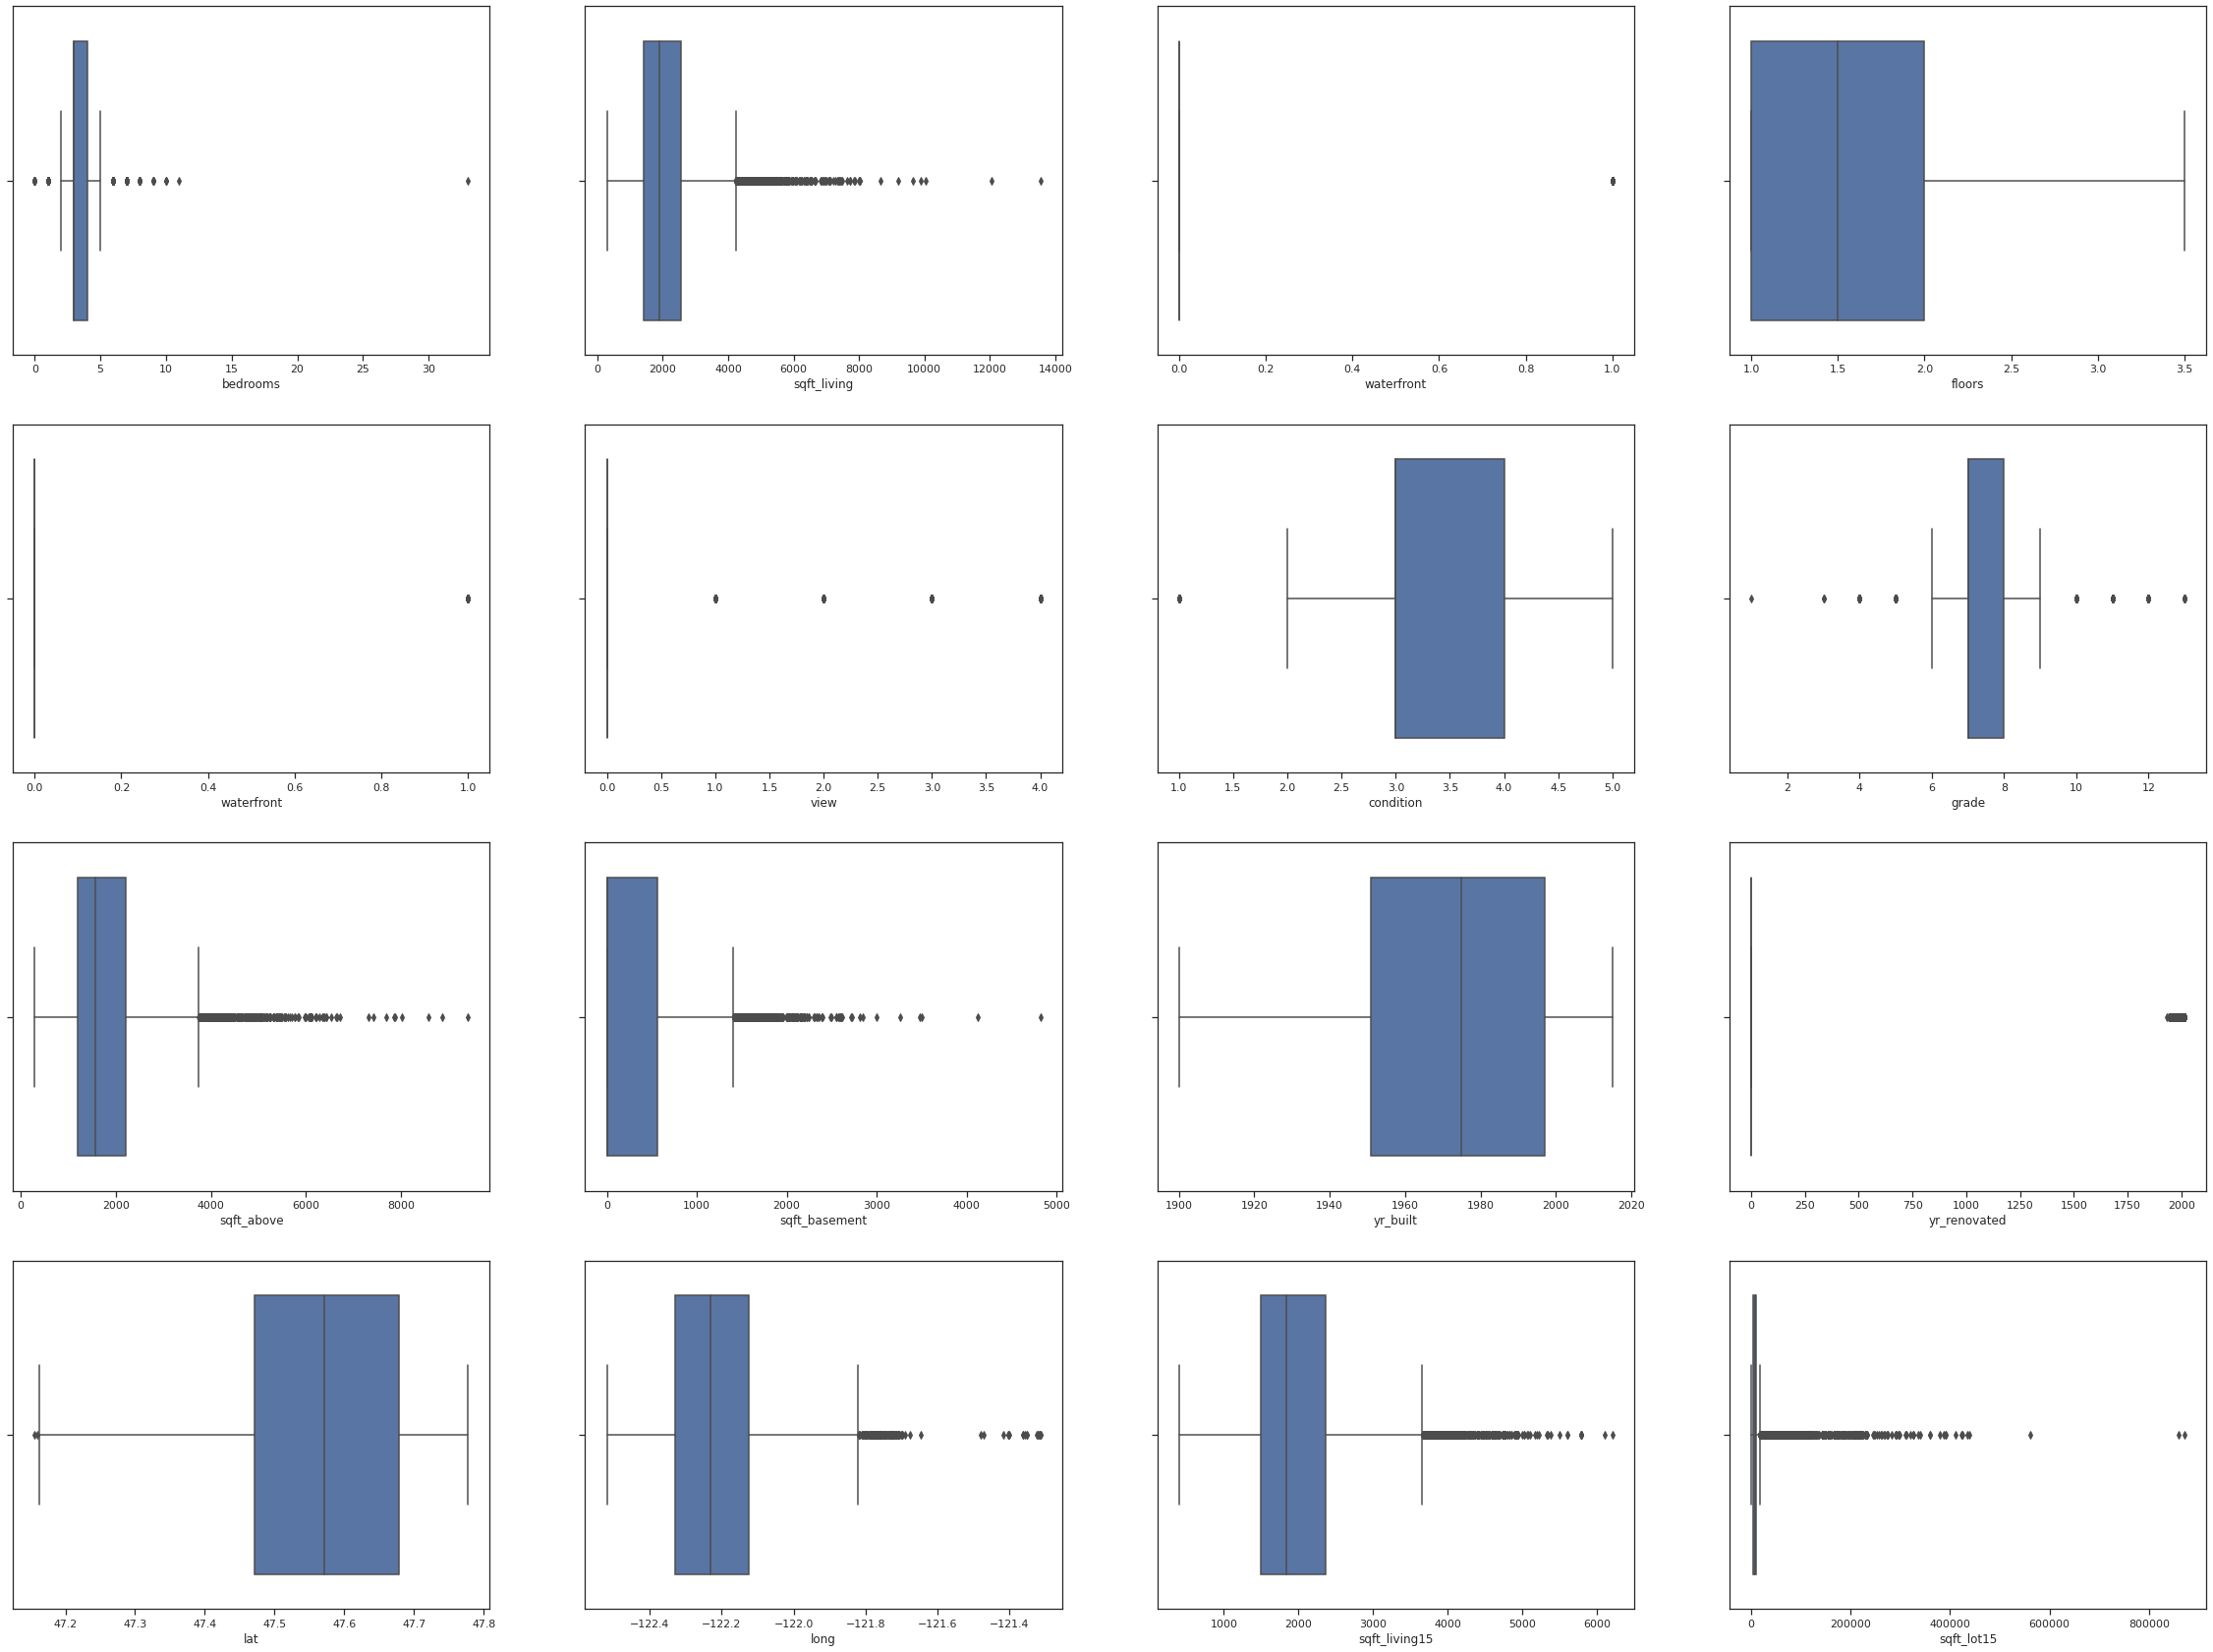

In [291]:
# Checking for outliers

f, axes = plt.subplots(4,4, figsize=(40,30))
sns.boxplot(data=df,x='bedrooms', ax=axes[0,0])
sns.boxplot(data=df,x='sqft_living', ax=axes[0,1])
sns.boxplot(data=df,x='waterfront', ax=axes[0,2])
sns.boxplot(data=df,x='floors', ax=axes[0,3])
sns.boxplot(data=df,x='waterfront', ax=axes[1,0])
sns.boxplot(data=df,x='view', ax=axes[1,1])
sns.boxplot(data=df,x='condition', ax=axes[1,2])
sns.boxplot(data=df,x='grade', ax=axes[1,3])
sns.boxplot(data=df,x='sqft_above', ax=axes[2,0])
sns.boxplot(data=df,x='sqft_basement', ax=axes[2,1])
sns.boxplot(data=df,x='yr_built', ax=axes[2,2])
sns.boxplot(data=df,x='yr_renovated', ax=axes[2,3])
sns.boxplot(data=df,x='lat', ax=axes[3,0])
sns.boxplot(data=df,x='long', ax=axes[3,1])
sns.boxplot(data=df,x='sqft_living15', ax=axes[3,2])
sns.boxplot(data=df,x='sqft_lot15', ax=axes[3,3])

We have a lot of outliers in our dataset. Multiple linear regression is very sensitive to outliers and can terribly affect the regression line and the forecasted value.

In checking for multicollinearity in our independent variables, I am going to use a heatmap to check the correlation coefficients of our independent variables and understand whether or not there is multicollinearity in our independent variables.

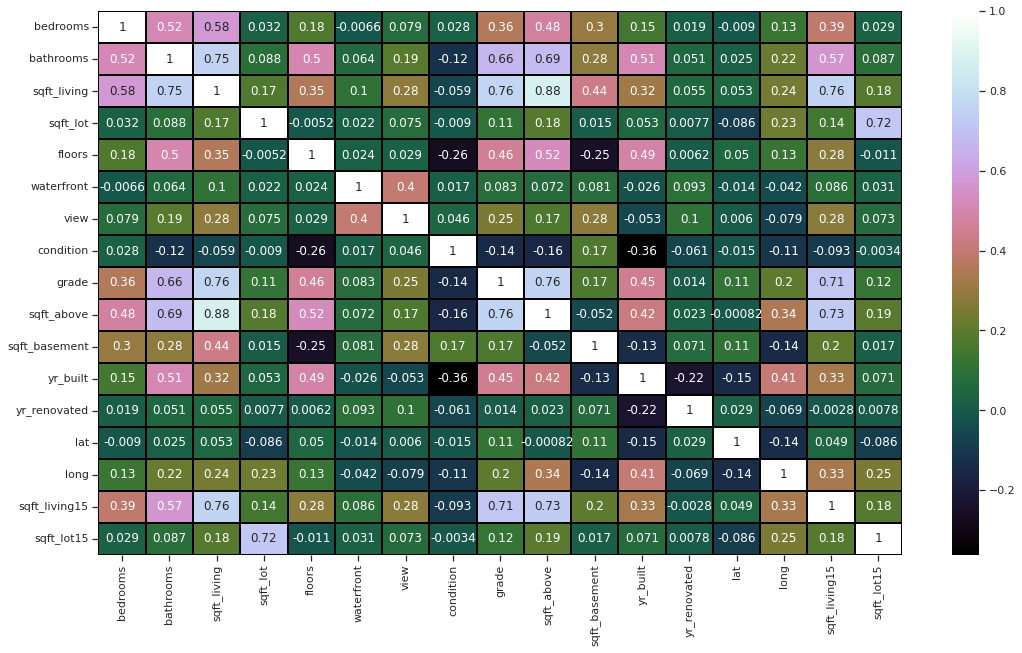

In [292]:
# Checking for multicollinearity in our independent variables

ind=df.drop('price',axis=1)
plt.figure(figsize=(18,10))
Correlation=sns.heatmap(ind.corr(),linewidths=1,annot=True, linecolor='black',cmap="cubehelix")

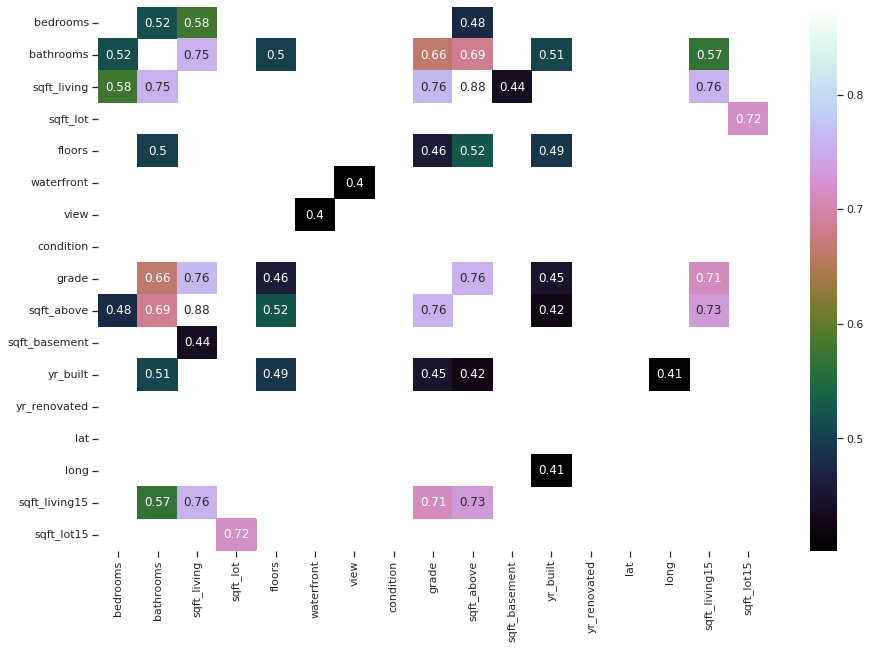

In [293]:
# To get a clear description of our heatmap, we will filter to select correlations with coefficients greater than +0.4 and less than -0.4. In this range we have strong correlation coefficients which
# we will use to establish whether or not there is multicollinearity.

Corr=ind.corr()
filteredDf = Corr[((Corr >= .4) | (Corr <= -.4)) & (Corr !=1.000)]
plt.figure(figsize=(15,10))
sns.heatmap(filteredDf, annot=True, cmap="cubehelix")
plt.show()

From the heatmap, we can conclude that there is a lot of multicollinearity in our independent variables. There is actually no strong negative correlation between variable coefficients. All of these variable coefficients have a strong positive correlation, meaning an increase in one independent variable leads to an increase in the other independent variable. Multicollinearity increases the variance of the coefficient estimates and makes the estimates very sensitive to minor changes in the model. What we want from our regression coefficients is a change in the dependent variable with a one unit increase in predictor value, with all other predictors held constant. With multicollinearity, this will **not** be achieved.

Checking the weight of each independent variable on the dependent variable.

In [294]:
# Separating our target label (price) from the other features
feat= df.drop(['price'], 1)
price_label = df['price']

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(feat, price_label)
lda_feat = lda_.transform(feat)

# Display the coeficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
long,17.480165
floors,1.501740
yr_built,0.139235
sqft_basement,0.002361
sqft_living,0.001899
sqft_above,0.000842
sqft_lot15,0.000022
sqft_lot,-0.000019
yr_renovated,-0.000565
sqft_living15,-0.001138


From our multivariate analysis, 'long' has a really high coefficient as compared to the other variable coefficients, meaning it is the variable that affects price the most. When we perform our regression analysis using 'long' as one of the independent variables, we will be putting a huge emphasis on that particular feature that it can be a good predictor of the outcome. When the coefficient is too large compared to others, the algorithm we will use in our modeling will overfitt to that particular data and fail to capture other coefficients.

**MULTIPLE LINEAR REGRESSION**

The baseline model will be our multiple linear regression model. As we observed before in our pairplots, there is a true relationship between our response varible(price) and our predictor variables and most of the relatonships are approximately linear. We also have a lot of observations in our dataset and performing Multiple linear regression for our baseline model will be a good start. We expect silly outputs from our regression model since we have not removed factors such as outliers and multicollinearity which will negatively affect our model. This model will provide us with a useful first step, and allow us to understand our problem better in order to inform us on the best way to approach it.

In [295]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.iloc[:, 1:-1].values
y=df['price'].values

# Creating train and test set using 80% as our training set and the remaining 20% as our test set

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size= .2, random_state=0)

regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [297]:
first_model = (mean_squared_error(y_true=y,y_pred=regressor.predict(X)))
print(first_model)

41186906246.63266


In [298]:
# Predicting our prices.

y_pred=regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'predicted': y_pred.flatten()})
comparison_frame.describe()


,Actual,predicted
count,4.322000e+03,4.322000e+03
mean,5.434344e+05,5.409126e+05
std,3.625612e+05,3.094730e+05
min,8.100000e+04,-5.292307e+05
25%,3.230000e+05,3.362122e+05
50%,4.500000e+05,4.808640e+05
75%,6.500000e+05,6.811582e+05
max,4.000000e+06,2.327869e+06


In [299]:
# Finding the error from our prediction.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125154.01190111163
Mean Squared Error: 38937488946.26465
Root Mean Squared Error: 197325.84459787482


In [300]:
# Checking the accuracy of our model.

model=LinearRegression()
#carrying out the training 
model.fit(X_train,y_train)
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.7037175984452452


Our model is 70.37% accurate despite using a complex model.

**RESIDUAL PLOT**

We now want to determine that our errors in the multiple linear regression are due to chance and that our model is capturing all the elememts influencing our dependant variable. We can do these by creating a residual plot and performing the heteroskedasticity test. What we will do is use the predicted values as our x-axis values and the difference between our predicted values and the actual values, which are the residuals, on our y_axis. We are doing this to assess the correctness of our model. For our model to be considered as correct, after plotting the residuals, the patterns should have a constant variance centered around the mean close to zero. If not, our model is probably incorrect.

In [301]:
# We now create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_pred, y_test)


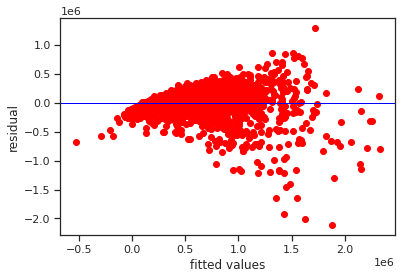

In [302]:
# Plotting our residuals

plt.scatter(y_pred, residuals, color='red')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='blue', linewidth=1)
plt.show()

We can actually see that the residuals are centered around the mean zero. There seems to be a constant variance in our plot, but to make sure that this is true, we will perform a heteroskedasticity test.

In [303]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test result is greater than the critical value, the variance is not constant, meaning the existence of patterns in the variance 
# and the variance is heterogenous.

# If the test result is less than the critical value, the variance is constant and no patterns exist, meaning that the variance
# in our data is homogeneous.

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


From the heteroskedasticity test results we can conclude that the variance across our data is constant.

**QUANTILE REGRESSION**

 In our multiple linear regression model, we have centered our model around the mean. Modeling the mean is not a full description of a relationship between dependent and independent variables and this is where quantile regression comes in. Quantile regression models the relationship between the independent variables and the conditional quantile of the dependent variable rather than just the conditional mean of the dependent variable. However, quantile regression is only flexible when modelling heterogenous data.

It is difficult to perform Quantile regression with a lot of muticollinearity in our data. I will therefore drop two columns with the highest VIF score (the variables which are highly collinear with other variables) and then perform quantile regression.

In [304]:
correlations = ind.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,1.648292,-0.463442,-5.984758e-01,0.049452,0.058088,0.061990,0.121214,-0.058413,0.302930,-3.349973e-01,-1.913668e-01,0.122122,0.044024,0.065701,-0.017847,0.015143,0.086163
bathrooms,-0.463442,3.350197,-3.138546e+00,-0.023969,-0.671115,0.009530,-0.038851,-0.141320,-0.270018,1.560572e+00,4.350999e-01,-0.942201,-0.261361,-0.033333,0.035290,0.086734,0.071833
sqft_living,-0.597221,-3.138664,1.814600e+13,-0.083915,2.689486,-0.070547,-0.040309,-0.140731,-1.923550,-1.636081e+13,-8.743992e+12,0.519798,0.164772,-0.120804,0.381674,-1.028522,-0.054647
sqft_lot,0.049452,-0.023969,-8.305361e-02,2.102522,0.044916,0.027404,-0.059328,0.030772,-0.053736,-1.244126e-01,-2.650651e-03,0.099133,0.021352,0.052861,-0.132067,0.164259,-1.459332
floors,0.058088,-0.671115,2.691870e+00,0.044916,1.994420,-0.003205,-0.054520,0.106406,-0.222281,-2.939150e+00,-6.901574e-01,-0.454933,-0.076203,-0.159185,0.239704,0.294238,0.071065
waterfront,0.061990,0.009530,-7.120470e-02,0.027404,-0.003205,1.203663,-0.490946,-0.015010,0.048143,-4.668717e-02,3.178339e-02,-0.024588,-0.066351,0.013997,0.017279,0.051543,-0.018270
view,0.121214,-0.038851,-3.862883e-02,-0.059328,-0.054520,-0.490946,1.423420,-0.007479,-0.178234,6.746515e-02,-2.447855e-01,0.173414,-0.036004,0.092563,0.134032,-0.307599,-0.008779
condition,-0.058413,-0.141320,-1.410818e-01,0.030772,0.106406,-0.015010,-0.007479,1.233851,-0.062576,1.898881e-01,-2.168142e-02,0.536593,0.203342,0.093623,-0.078088,0.055509,-0.026740
grade,0.302930,-0.270018,-1.926852e+00,-0.053736,-0.222281,0.048143,-0.178234,-0.062576,3.412821,1.319846e-01,4.464151e-01,-0.651755,-0.073313,-0.315446,0.356999,-0.922118,0.072638
sqft_above,-0.333051,1.558704,-1.636081e+13,-0.123783,-2.937064,-0.047372,0.069286,0.189732,0.128427,1.475124e+13,7.883763e+12,0.062919,-0.148019,0.275920,-0.652465,-0.598757,-0.127148


In [305]:
# Column 'sqft_above has the highest VIF score. We will drop it.

ind.drop(['sqft_above','sqft_basement'],axis=1,inplace=True)

In [306]:
# using the python package statsmodels for Quantile Regression

import statsmodels.formula.api as smf

x=ind.values
y=df[['price']].values

# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)

# summary of our model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4662
Model:                       QuantReg   Bandwidth:                   1.963e+04
Method:                 Least Squares   Sparsity:                    2.670e+05
Date:                Sat, 27 Nov 2021   No. Observations:                21610
Time:                        20:58:58   Df Residuals:                    21594
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -797.1172      7.240   -110.106      0.000    -811.307    -782.927
x[0]       -2.135e+04   1252.778    -17.043      0.000   -2.38e+04   -1.89e+04
x[1]        3.681e+04   2124.073     17.330      0.000    3.26e+04     4.1e+04
x[2]          96.1842      2.211     43.507      0.0

In [307]:
ind.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Our intercept is -797.1172 and the x's represent the coefficients of our independent variables. These are the parameters for the 0.5th quantile of our dependent variable. Our summary also points out the possibility of multicollinearity in our data. This is true because we did not completely drop the variables that are causing the multicollinearity.  

Considering there are a lot of variables, we cannot find the quantiles of all the variable coefficients at once. I will therefore use x[6] which is the coefficient of the 'view' column to find the models in the different quantiles.

In [308]:
# Models for other quantiles in the view column

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x[6]']] + res.conf_int().loc['x[6]'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt    intercept        x_coef  cf_lower_bound  cf_upper_bound
0  0.1    41.020214  27026.406416    24479.204522    29573.608309
1  0.2 -1427.537977  32966.908988    30387.067025    35546.750952
2  0.3 -1085.526184  39173.870598    36571.868128    41775.873068
3  0.4  -127.918127  43766.100435    41132.764901    46399.435968
4  0.5  -797.117198  52626.015799    49905.484476    55346.547122
5  0.6  -523.701265  68019.799593    65052.989890    70986.609296
6  0.7  1858.579330  66460.480691    63188.946976    69732.014406
7  0.8  1393.750553  73421.193468    69381.067965    77461.318970
8  0.9 -3857.379633  97314.889374    91833.651231   102796.127517


Text(0.5, 1.0, 'Data with non-constant variance')

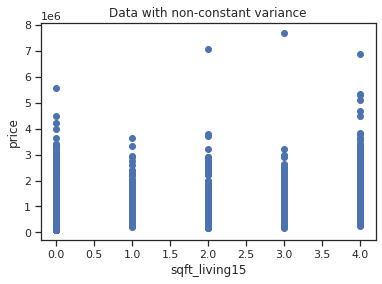

In [309]:
# Looking at the relationship between column 'view' and 'price'

plt.figure(3)
plt.scatter(data=df,x='view', y='price')
plt.xlabel("sqft_living15")
plt.ylabel("price")
plt.title("Data with non-constant variance")

In [314]:
## Let's now trying to fit a linear regression
# 
model1 = LinearRegression(fit_intercept = True, normalize = False)
view=df['view'].values.reshape(-1,1)
price=df['price'].values.reshape(-1,1)
model1.fit(view, price)
y_pred = model1.predict(view)

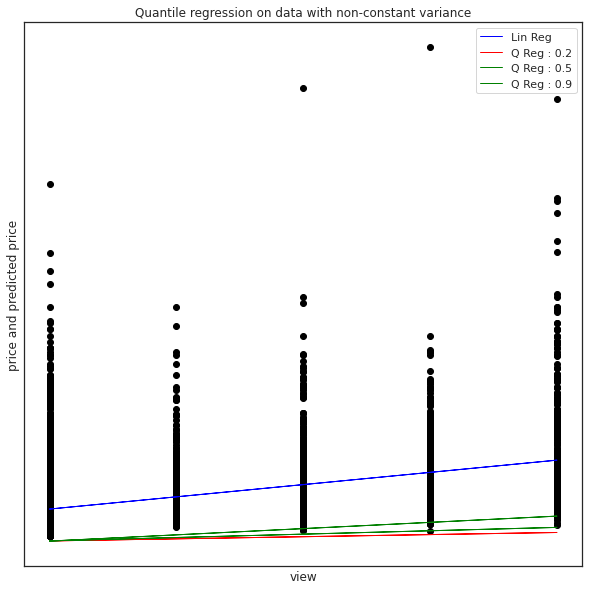

In [315]:
# plotting the 0.2th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(figsize=(10,10))
plt.scatter(view, price,  color='black')
plt.plot(view, y_pred, color='blue',
         linewidth=1, label='Lin Reg')

y_pred2= models[1].params['Intercept'] + models[1].params['x[6]'] * view
plt.plot(view, y_pred2, color='red',
         linewidth=1, label='Q Reg : 0.2')

y_pred3 = models[4].params['Intercept'] + models[4].params['x[6]'] * view
plt.plot(view, y_pred3, color='green',
         linewidth=1, label='Q Reg : 0.5')


y_pred4 = models[8].params['Intercept'] + models[8].params['x[6]'] * view
plt.plot(view, y_pred4, color='green',
         linewidth=1, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("view")
plt.ylabel("price and predicted price")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

There isn't a big difference between the different quantiles probably because quantile regression is flexible for modeling data in heterogenous conditional distributions. As seen in our multiple regression, the heteroscedasticity in our coefficients is homogenous.

**RIDGE REGRESSION**

With high multicollinearity in our dataset, Ridge regression would be a good regression technique to go with. Multicollinearity produces high variance. The main idea behind regression is to introduce a small amount of bias. This small bias introduced drops the variance. Ridge regression drops the variance by introducing the Ridge Regression penalty. The penalty reduces the sensitivity of the data. In regards to irrelevant variables, ridge regression will work best when most of our variables are useful. If there are irrelevant variables the best ridge regression can do is shrink their parameters but will not eliminate them. Ridge regression is used for optimization to mainly prevent overfitting, but using a very large ridge penalty can lead to underfitting.

In [322]:
# After importing the necessary libaries for our regression model, we need to find the best l2 hyperparameter to use in 
# our regularization. To do this, we first normalize our ridge regression to get the best parameter estimates. We then 
# perform crossvalidation over a range of values which then finds different parameters in the range between -7 and 10.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X=df.iloc[:, 1:-1]
y=df['price']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size= .2, random_state=0)

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-7,2,10)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [323]:
# Alpha is used to represent our hyperparameters. After finding the parameters, we will look for the best one to fit 
# in our ridge regression.

import warnings
warnings.filterwarnings('ignore')

search.fit(X,y)
search.best_params_

{'alpha': 0.01}

Our best parameter is 0.01.

We need to fit our model with this ridge information to find the model's mean score.

In [324]:
# Fitting the model with our alpha value.

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print('Mean Squared Error:', second_model)

Mean Squared Error: 41160457078.16773


From our multiple linear regression, we see that our MSE is 38937488946.26465. Our ridge regression MSE is higher than the Mean Squared Error of our Multiple linear regression model, meaning that the coefficients of our predicted independent variables are closer to the actual values in our baseline model than in our Ridge regression model.

Let us now compare the coefficients of our variables before and after regularization.

In [326]:
# Coefficients of our ridge regression model.

coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 42209.40157799899,
 'bedrooms': -32565.619044214054,
 'condition': 31046.82765717359,
 'floors': 2387.432602131469,
 'grade': 95715.36170426809,
 'lat': 559712.008984968,
 'long': -125264.30958385437,
 'sqft_above': 89.94796242674566,
 'sqft_basement': 58.69021347635429,
 'sqft_living': 86.74818641726137,
 'sqft_living15': 29.091261240906526,
 'sqft_lot': -0.04376392501974186,
 'view': 49719.180268920885,
 'waterfront': 581804.9690549864,
 'yr_built': -2405.523608437529,
 'yr_renovated': 22.44884159607293}

In [327]:
# Coefficients of our baseline model variables.

coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 42572.81524706159,
 'bedrooms': -33686.40086198869,
 'condition': 30894.853219729972,
 'floors': 1502.4001363370376,
 'grade': 97623.81182128264,
 'lat': 562439.6863114517,
 'long': -122498.6659061242,
 'sqft_above': 70.33943185171483,
 'sqft_basement': 37.85838094696328,
 'sqft_living': 108.19781284391684,
 'sqft_living15': 26.53941794855382,
 'sqft_lot': -0.050058768058079295,
 'view': 49537.997591048406,
 'waterfront': 586426.7419772389,
 'yr_built': -2463.570494002219,
 'yr_renovated': 21.4820090921325}

There is no significant change in our coefficients. Optimization in our ridge regression did not have a big effect.

In [328]:
# Checking the accuracy of our ridge model.

model=Ridge()
#carrying out the training 
model.fit(X_train,y_train)
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.7038845586852273


In [329]:
# Checking the accuracy of our baseline model.

model=LinearRegression()
#carrying out the training 
model.fit(X_train,y_train)
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.7037175984452356


Our ridge regression is 70.38% accurate. That is slightly better than our baseline model by 0.01%. This small difference in accuracy proves further that Ridge regression did not have a big effect on our multiple linear regression model. They are closely similar to one another.

**LASSO REGRESSION**

Lasso performs regularization just like ridge regression but is different from ridge such that it performs feature selection. Lasso is able to pick only the relevant features in developing a predictive model. Our dataset might be having irrelevant features and Lasso comes in handy by removing such features from shrinking their coefficients to exactly zero. Correlated features are handled the same way. Lasso wil only pick one of the correlated values and shrinks the others. The limitation of Lasso in handling multicollinearity is that Lasso might choose one of the multicollinear variables without understanding the context. This might eliminate the relevant independent variables.

In [335]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# Splitting our data.

X=df.iloc[:, 1:-1]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standadizing our features
# We standardize our features so that we can fit different variables on an identical scale.
# This helps us to compare coefficients between the different variables.

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [336]:
# After building our Lasso model, we find our hyperparameter in Lasso the same way we did in ridge regression. We define the set of parameters for GridSearch
# and then perform our GridSearch.
parameters = {'alpha': np.concatenate((np.arange(0.01,0.2,0.01), np.arange(0.2, 0.5, 0.05), np.arange(0.5, 2.5, 0.1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and printing the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 2.3999999999999995}
lasso score: 0.7037289949506992
linear score: 0.7037175984452356
lasso MSE: 38935991215.37408
linear MSE: 38937488946.26591
lasso best estimator coef: [-3.44385584e+04  4.06288209e+04  2.78777079e+02 -3.63875427e-02
  8.43506514e+02  6.44584832e+05  4.96810876e+04  3.17779735e+04
  9.68653546e+04 -1.01028878e+02 -1.31179142e+02 -2.40932301e+03
  2.16463721e+01  5.61351537e+05 -1.27048334e+05  2.94401799e+01]
linear coef: [-3.44402242e+04  4.06375519e+04  1.08442660e+02 -3.62488005e-02
  8.42541642e+02  6.44960846e+05  4.96671316e+04  3.17886950e+04
  9.68600153e+04  6.93026709e+01  3.91399892e+01 -2.40892715e+03
  2.16459712e+01  5.61480384e+05 -1.27206097e+05  2.94507662e+01]


In [340]:
# Checking the accuracy of Lasso regression model.

model = linear_model.Lasso() 
#carrying out the training 
model.fit(X_train,y_train)
print('Lasso Model Accuracy:',model.score(X_test,y_test))

Lasso Model Accuracy: 0.703722350127187


In [341]:
model=LinearRegression()
#carrying out the training 
model.fit(X_train,y_train)
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.7037175984452356


Our Lasso regression model has a lower MSE error than our baseline linear model. This means that the coefficients of our predicted independent variables in our Lasso regression model are closer to the actual values than in our baseline model. It is also slightly more accurate than the baseline linear model but the difference is not much in terms of accuracy.

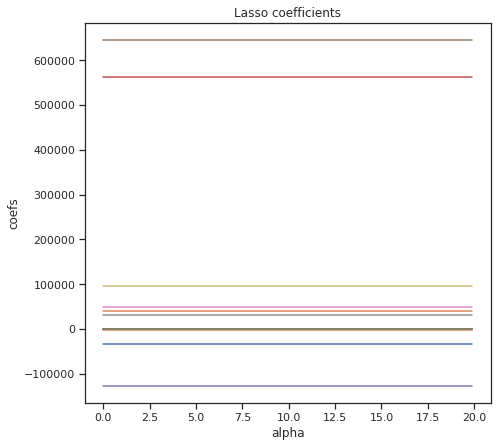

In [342]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

From the plot, Lasso influences less on the large coefficients, but the small ones Lasso almost shrinks to zero. Looking at the coefficients below, the large coefficients in our Lasso regression at the top of our plot are from variables 'Waterfront' and 'lat', while the smallest coefficient is 'sqft_lot' since it is very close to zero.

In [343]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40637.51602258036,
 'bedrooms': -34440.21737041934,
 'condition': 31788.65026881978,
 'floors': 842.5456126119919,
 'grade': 96860.03728952947,
 'lat': 561479.8471702964,
 'long': -127205.43991973173,
 'sqft_above': -101.03016986454175,
 'sqft_basement': -131.1927999347226,
 'sqft_living': 278.7755124584027,
 'sqft_living15': 29.450722307947405,
 'sqft_lot': -0.03624937841349907,
 'view': 49667.18971772448,
 'waterfront': 644959.2791922993,
 'yr_built': -2408.928799263461,
 'yr_renovated': 21.645972788370045}

None of the coefficients have been completely removed.

**ELASTIC NET REGRESSION**

Uses a combination of both ridge and Lasso regression penalties. Good when dealing with correlated variables. Elastic Net Regression groups and shrinks the coefficients associated with the correlated variables and either removes them or leaves them in the equation. This type of regression is useful in highly correlated variables. Similar to Lasso, it might remove relevant independent variables, but chances are lower as compared to Lasso Regression.

In [345]:
from sklearn.linear_model import ElasticNet

# We normalize our Elastic regression to get the best parameter estimates.
# After creating our train and test sets, we will define our parameters and then perform our GridSearch.
# The 'l1_ratio' acts as a moderator by splitting the value of alpha for the Lasso and ridge regression depending
# on the ratio size. 

# The l1_ration must range between 0 and 1.

X=df.iloc[:, 1:-1]
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [347]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

We get our alpha as 0.00001 and our l1_ratio as 0.8.

In [348]:
# The best hyperparameter is an alpha set to 0.00001 and a l1_ratio of 0.8. 
# We get an MSE of 41239727894.567986, which is above our baseline model of MSE 41155147318.30645.
# This means that elastic net is doing worse than linear regression. 
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

41239727894.567986


The MSE of our Elastic Net Regression is higher than that of the baseline model i.e 38937488946.26465 meaning that the coefficients of our predicted independent values are closer to the actual values in our baseline model than in our Lasso regression model.

In [350]:
# Below are the coefficients of our Elastic Net regression.
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients have significantly changed. 
# However, none of the variables have been removed from the model, a likely indication that most of the features are relevant 
# for our prediction. Most of the variables, apart from 'sqft_lot', are far from zero, meaning that these variables were good for the algorithm.

{'bathrooms': 41258.62885347385,
 'bedrooms': -29149.259511174732,
 'condition': 31312.421060435387,
 'floors': 4895.465481991551,
 'grade': 90279.14437978661,
 'lat': 550116.8031407422,
 'long': -131965.69756691973,
 'sqft_above': 86.78296694068301,
 'sqft_basement': 59.19439246714302,
 'sqft_living': 84.29238389066862,
 'sqft_living15': 36.00187222086159,
 'sqft_lot': -0.025946270662106037,
 'view': 50232.102769602505,
 'waterfront': 567212.0199413982,
 'yr_built': -2236.6469538845367,
 'yr_renovated': 25.112595096405858}

In [351]:
# Checking  for the accuracy of our Elastic Net regression model

model=ElasticNet()
#carrying out the training 
model.fit(X_train,y_train)
print('Model Accuracy:',model.score(X_test,y_test))


Model Accuracy: 0.639946424965741


Our Elastic Net regression has the lowest accuracy of about 64%.

**CONCLUSION**

Our Lasso and Ridge regression models have an accuracy of above 70%. Elastic Net has the lowest accuracy of 64% and the highest MSE of all the regression models. However this does not mean that this model is the worst. Ultimately, which model to use will depend on the goal of the analysis. If we are looking for the best predictions, then Ridge regression is the best one to go with. If we are looking for interpretability so that we can have a better understanding of the underlying data, then Elastic Net may be the best one to go with. It would therefore be wrong to rank these regressions in terms of importance.